# Modelo de Evaluación y Refinamiento 

Este Notebook ayudará a comprender la evaluación y refinamiento de los modelos de predicción.

Importamos las librerías a usar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Descargamos el conjunto de datos usar.

In [4]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Primero, vamos a usar solo los datos numéricos.

In [5]:
df = df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


Eliminamos las columnas **Unnamed: 0.1** y **Unnamed: 0**, estas no aportan ningun valor a los modelos.

In [6]:
df.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1, inplace=True)
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


Librerías para gráficas.

In [7]:
from ipywidgets import interact, interactive, fixed, interact_manual

### Funciones para gráficas

In [8]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 8
    height = 6
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [9]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 8
    height = 6
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

## 1. Entrenamiento y Testeo

Un paso importante en la prueba de tu modelo es dividir tus datos en datos de entrenamiento y prueba. Colocaremos los datos objetivo de **price** en un dataframe separado llamado **y_data**:

In [10]:
y_data = df['price']

Eliminamos el dato **price** del dataframe df y el dataframe sin la columna eliminada la almacenamos en un nuevo dataframe llamado **x_data**.

In [11]:
x_data = df.drop('price', axis=1)

**x_data** ya no tendrá la columna **price**.

In [15]:
x_data.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,13.055556,0,1


Ahora, dividimos nuestros datos de forma aleatoria en datos de entrenamiento y prueba utilizando la función `train_test_split` de  la librería de Sklearn.

In [16]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("Numero de muestras del test :", x_test.shape[0])
print("Numero de muestas del entrenamiento:",x_train.shape[0])

Numero de muestras del test : 21
Numero de muestas del entrenamiento: 180


**x_train, x_test, y_train**, y **y_test** son las variables que almacenarán los conjuntos de entrenamiento y prueba para las características y las etiquetas, respectivamente.

El parámetro **test_size** establece la proporción de datos que se divide en el conjunto de prueba. En el ejemplo anterior, el conjunto de prueba es el 10% del total del conjunto de datos. 

El parámetro **random_state** establece una semilla para el generador de números aleatorios. Esto garantiza que, aunque el muestreo se realice de manera aleatoria, el resultado será reproducible. Es decir, si vuelves a ejecutar la división con la misma semilla, obtendrás la misma división de datos de entrenamiento y prueba.

Incrementemos el número de muestras usada para test a un 40% y un número de semilla de 0.

In [17]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data , y_data, test_size= 0.40, random_state=0)

print('EL numero de muestras del test es:', x_test1.shape[0])
print('EL numero de muestras del entrenamiento es:', x_train1.shape[0])

EL numero de muestras del test es: 81
EL numero de muestras del entrenamiento es: 120


Importamos `LinearRegression` desde el módulo `linear_model`.

In [20]:
from sklearn.linear_model import LinearRegression

Creamos el objeto LinnearRegression.

In [21]:
lre = LinearRegression()

Entrenamos el modelo usando la caracteristica **horsepower** .

In [24]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

Calculamos R-cuadrado de los datos de prueba.

In [25]:
lre.score(x_test[['horsepower']], y_test)

0.3635875575078824

Ahora R-cuadrado de los datos de entrenamiento.

In [26]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515103

Podemos observar que el valor de R-cuadrado es mucho menor usando los datos de prueba que en comparación con los datos de entrenamiento.

De la misma manera determinemos el valor de R-cuadrado de los datos de prueba y entrenamiento con un valor de 40% de muestras para el test.

In [29]:
# Creamos el objeto LinnearRegresion
lre1 = LinearRegression()

# Entrenamos el modelo usando horsepower
lre1.fit(x_train1[['horsepower']], y_train1)

# Buscamos los valores de R-cuadrado
print('R-cuadrado para datos de entrenamiento:',lre1.score(x_train1[['horsepower']], y_train1))
print('R-cuadrado para datos de prueba:',lre1.score(x_test1[['horsepower']], y_test1))

R-cuadrado para datos de entrenamiento: 0.5754067463583004
R-cuadrado para datos de prueba: 0.7139364665406973


Algunas veces no se tiene suficientes datos de prueba, por lo que querrás realizar una validación cruzada. Veamos algunos métodos para realizar una validación cruzada.

### Cross-Validation Score

Importamos **cross_val_score** desde el módulo **model_section**.

In [30]:
from sklearn.model_selection import cross_val_score


Utilizamos el objeto, la característica ("horsepower") y los datos objetivo (y_data). El parámetro 'cv' determina el número de pliegues. En este caso, es 4.

In [31]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

La puntuación predeterminada es R^2. Cada elemento en el array tiene el valor promedio de R^2 para el pliegue:

In [32]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

Podemos calcular el promedio y la desviación estandar de nuestra estimación.

In [33]:
print("El promedio de los pliegues es:", Rcross.mean(), "Y la desviación estandar es:" , Rcross.std())

El promedio de los pliegues es: 0.522009915042119 Y la desviación estandar es: 0.2911839444756029


Podemos utilizar el error cuadrado negativo como puntuación estableciendo el parámetro de métrica **scoring** en **neg_mean_squared_error**.

In [34]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.72247591])

Calculemos el promedio de R-cuadrado usando solo 2 pliegues.

In [36]:
Rc = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
Rc.mean()

0.5166761697127429


También puedes usar la función`'cross_val_predic`' para predecir la salida. La función divide los datos en el número especificado de pliegues, con un pliegue para pruebas y los otros pliegues se utilizan para entrenamiento. Primero, importa la función:

In [37]:
from sklearn.model_selection import cross_val_predict

Ingresamos el objeto, la característica **horsepower** y los datos objetivo **y_data**. El parámetro 'cv' determina el número de pliegues. En este caso, es 4. Podemos producir una salida:

In [38]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

## 2. Sobreajuste, Subajuste y Selección del Modelo

Resulta que los datos de prueba, a veces llamados "datos fuera de la muestra", son una medida mucho mejor de qué tan bien funciona su modelo en el mundo real. Una razón para esto es el sobreajuste.

Veamos algunos ejemplos. Resulta que estas diferencias son más evidentes en la Regresión Lineal Múltiple y la Regresión Polinómica, así que exploraremos el sobreajuste en ese contexto.

Vamos a crear un objeto de regresión lineal múltiple y entrenar al modelo usando **'horsepower', 'curb-weight', 'engine-size'** y **'highway-mpg'** como caracteristicas.

In [40]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

Predicción usando datos de entrenamiento

In [41]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

Predicción usadno datos de prueba.

In [42]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

Primero, importemos la biblioteca seaborn para hacer gráficos.

In [45]:
import seaborn as sns

Veamos la distribución de los valores predichos de los datos de entrenamiento.




D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


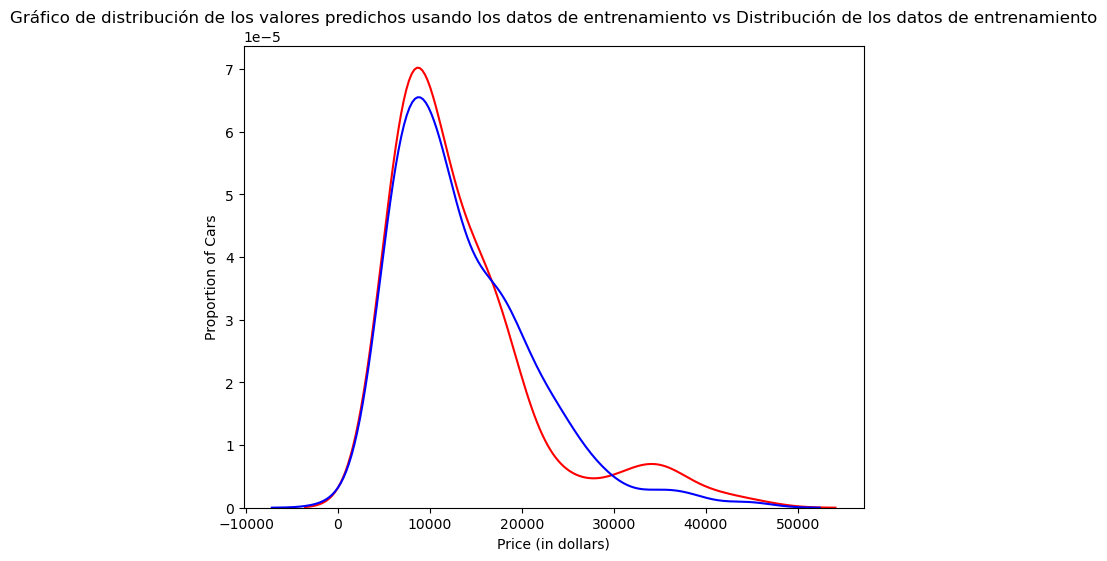

In [46]:
Title = 'Gráfico de distribución de los valores predichos usando los datos de entrenamiento vs Distribución de los datos de entrenamiento'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Hasta ahora, el modelo parece estar aprendiendo bien del conjunto de datos de entrenamiento. ¿Pero qué sucede cuando el modelo encuentra nuevos datos del conjunto de pruebas? Cuando el modelo genera nuevos valores a partir de los datos de prueba, observamos que la distribución de los valores predichos es muy diferente de los valores reales objetivo.

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


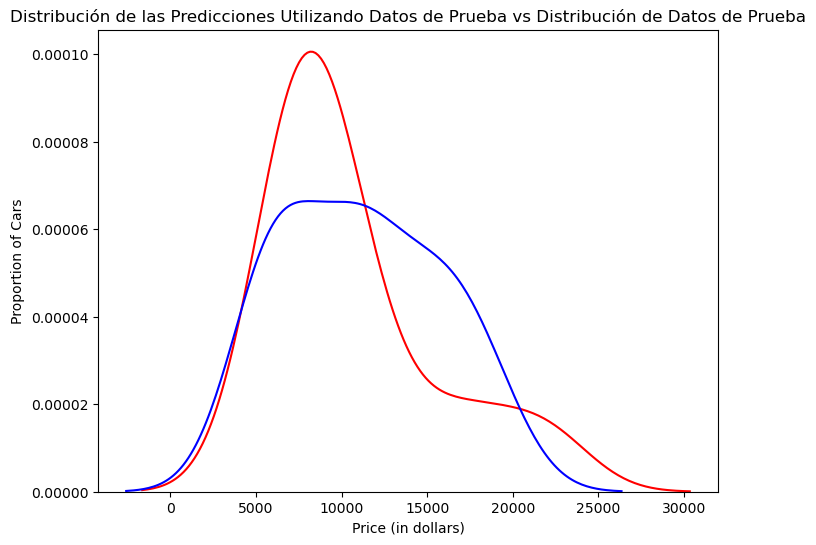

In [47]:
Title='Distribución de las Predicciones Utilizando Datos de Prueba vs Distribución de Datos de Prueba'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Comparando la Figura 1 y la Figura 2, es evidente que la distribución de los datos de prueba en la Figura 1 se ajusta mucho mejor a los datos. Esta diferencia en la Figura 2 es aparente en el rango de 5000 a 15,000. Aquí es donde la forma de la distribución es extremadamente diferente. Veamos si la regresión polinómica también muestra una disminución en la precisión de la predicción al analizar el conjunto de datos de prueba.

In [48]:
from sklearn.preprocessing import PolynomialFeatures

### Sobreajuste

El sobreajuste ocurre cuando el modelo se ajusta al ruido, pero no al proceso subyacente. Por lo tanto, al probar tu modelo usando el conjunto de prueba, tu modelo no funciona tan bien ya que está modelando el ruido, no el proceso subyacente que generó la relación. Vamos a crear un modelo polinómico de grado 5.

Usaremos un 45% de datos para el entrenamiento, el resto para la prueba.

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

Realizaremos una transformación polinómica de grado 5 en la característica **horsepower**.

In [50]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

Ahora, ceramos el modelo de regresión lineal **poly** y lo entrenamos.

In [51]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

Podemos ver la salida de nuestro modelo usando el método `predict`, lo asignamos a la variable yhat.

In [53]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.70591245,  7308.0293325 , 12213.78503102, 18893.18944398,
       19995.88763308])

Tomemos los primeros cinco valores predichos y comparemos con los objetivos reales.

In [54]:
print("Valores predecidos:", yhat[0:4])
print("Valores verdaderos:", y_test[0:4].values)

Valores predecidos: [ 6728.70591245  7308.0293325  12213.78503102 18893.18944398]
Valores verdaderos: [ 6295. 10698. 13860. 13499.]


Usaremos la función "PollyPlot" que definimos al principio del laboratorio para mostrar los datos de entrenamiento, los datos de prueba y la función predicha.

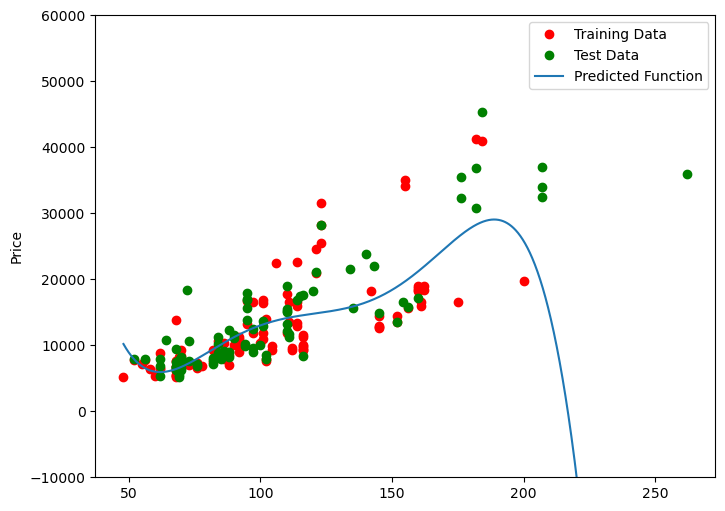

In [55]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

La gráfica muestra un modelo de regresión polinomial donde los puntos rojos representan los datos entrenados, los puntos verdes representan los datos de prueba y la línea azul representa el modelo de predicción. 

Vemos que la función estimada parece seguir los datos, pero alrededor de 200 caballos de fuerza, la función comienza a divergir de los puntos de datos.

R-cuadrado de los datos de entrenamiento.

In [56]:
poly.score(x_train_pr, y_train)

0.5567716902637501

R-cuadrado de los datos de prueba.

In [58]:
poly.score(x_test_pr, y_test)

-29.871424242023895

Vemos que el R-cuadrado para los datos de entrenamiento es 0.5567, mientras que el R^2 en los datos de prueba fue -29.87. Cuanto menor sea el R-cuadrado, peor será el modelo. Un R-cuadrado negativo es un signo de sobreajuste.

Veamos cómo cambia el R-cuadrado en los datos de prueba para diferentes órdenes de polinomios y luego grafiquemos los resultados:

In [1]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('orden')
plt.ylabel('R-cuadrado')
plt.title('R-cuadrado usando datos de prueba')
plt.text(3, 0.75, 'Maximo de R-cuadrado ')    

NameError: name 'PolynomialFeatures' is not defined

Vemos que el R-cuadrado aumenta gradualmente hasta que se utiliza un polinomio de tercer orden. Luego, el R-cuadrado disminuye drásticamente en un polinomio de cuarto orden.

La siguiente función se utilizará en la próxima sección. Por favor, ejecuta la celda a continuación.

In [63]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

Podemos realizar transformaciones polinómicas con más de una característica. Crea un objeto "PolynomialFeatures" llamado "pr1" de grado dos.

In [65]:
pr1 = PolynomialFeatures(degree=2)

Transforma las muestras de entrenamiento y prueba para las características 'horsepower', 'curb-weight', 'engine-size' y 'highway-mpg'. Pista: utiliza el método "fit_transform".

In [66]:
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])


Veamos el número de su dimensión.

In [67]:
x_train_pr1.shape 

(110, 15)

Creamos una modelo de resgresión lineal llamado **poly1**. Entrenamos al onjeto usando el método `fit`.

In [68]:
poly1=LinearRegression().fit(x_train_pr1,y_train)

Utiliza el método `predict` para predecir una salida en las características polinómicas, luego utiliza la función "DistributionPlot" para mostrar la distribución de la salida de prueba predicha frente a los datos de prueba reales.

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


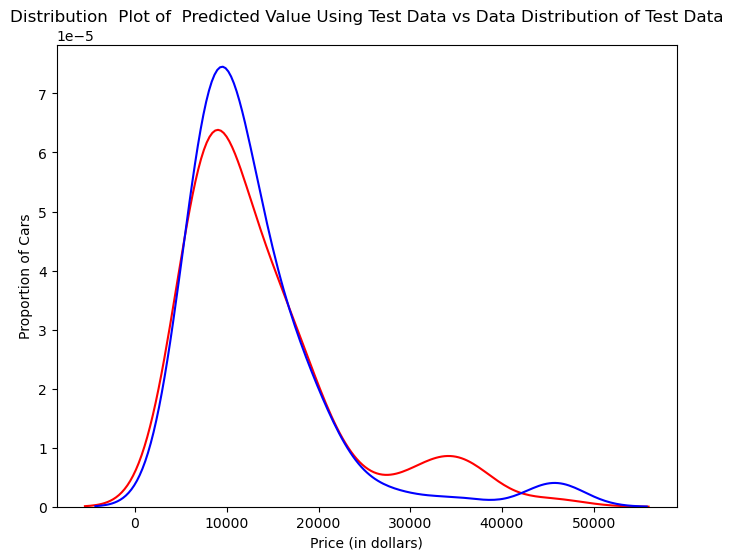

In [69]:
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)


El valor predicho es más alto que el valor real para los automóviles cuyo precio está en el rango de 10,000; por otro lado, el precio predicho es más bajo que el costo real en el rango de 30,000 a 40,000. Por lo tanto, el modelo no es tan preciso en estos rangos.

## 3. Regresión Ridge

En esta sección, revisaremos la Regresión Ridge y veremos cómo el parámetro alfa cambia el modelo. Solo un apunte, aquí nuestros datos de prueba se utilizarán como datos de validación.

Realicemos una transformación polinómica de grado dos en nuestros datos.

In [71]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

Importamos `Ridge` desde el módulo `linear models`.

In [73]:
from sklearn.linear_model import Ridge

Creamos un objeto de resgresión Ridge, ajustando el parámetro de regularización en alpha 1.

In [74]:
RigeModel=Ridge(alpha=1)

Al igual que la regresión regular, podemos entrenar al modelo usando el método `fit`.

In [76]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

De igual manera, podemos obtener una predicción.

In [78]:
yhat = RigeModel.predict(x_test_pr)

Comprobemo nuestras primeras 5 muestras predichas con el conjunto de pruebas.

In [79]:
print('Prediccion:', yhat[0:4])
print('conjunto de pruebas :', y_test[0:4].values)

Prediccion: [ 6570.82441941  9636.24891471 20949.92322737 19403.60313255]
conjunto de pruebas : [ 6295. 10698. 13860. 13499.]


Seleccionamos el valor de alfa que minimiza el error de prueba. Para hacerlo, podemos usar un bucle for. También hemos creado una barra de progreso para ver cuántas iteraciones hemos completado hasta ahora.

In [80]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|████████████████████████████████████████| 1000/1000 [00:01<00:00, 650.17it/s, Test Score=0.564, Train Score=0.859]


Podemos gráficar el valor de R-cuadrado de los distintos valores de alpha.

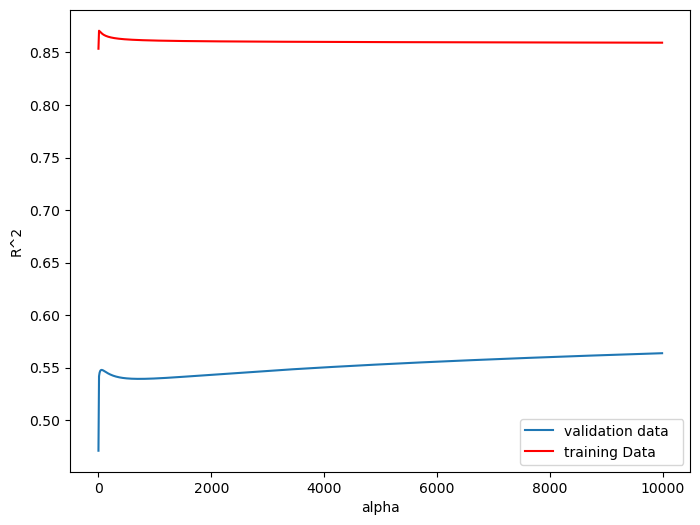

In [82]:
width = 8
height = 6
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

La línea azul representa el R-cuadrado de los datos validados, y la línea roja representa el R-cuadrado de los datos entrenados. El eje x representa los distintos valores de alpha.

Aquí, el modelo se construye y se prueba en los mismos datos, por lo que los datos de entrenamiento y prueba son los mismos.

La línea roja en la Figura 4 representa el R-cuadrado de los datos de entrenamiento. A medida que alfa aumenta, el R-cuadrado disminuye. Por lo tanto, a medida que alfa aumenta, el modelo funciona peor en los datos de entrenamiento.

La línea azul representa el R-cuadrado en los datos de validación. A medida que el valor de alfa aumenta, el R-cuadrado aumenta y converge en un punto.

Realicemos la regresión Ridge. Calculando el R-cuadrado utilizando las características polinomiales, utilizar los datos de entrenamiento para entrenar el modelo y los datos de prueba para probarlo. El parámetro alpha debe establecerse en 10.

In [83]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440207269

## 4. Búsqueda en Cuadrícula (Grid Search)

El término alfa es un hiperparámetro. Scikit-learn tiene la clase `GridSearchCV` para simplificar el proceso de encontrar el mejor hiperparámetro.

Importemos `GridSearchCV` desde el módulo `model_selection`.

In [84]:
from sklearn.model_selection import GridSearchCV

Creamos un diccionario con los valores de los parámetros.

In [85]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Creamos el objeto de regresión de Ridge.

In [86]:
RR=Ridge()
RR

Ridge()

Creamos una cuadricula de busqueda.

In [87]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

Entrenamos al modelo.

In [88]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

El objeto encuentra los mejores valores de parámetros en los datos de validación. Podemos obtener el estimador con los mejores parámetros y asignarlo a la variable BestRR de la siguiente manera:

In [89]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

Ahora probemos nuestro modelo en los datos de prueba.

In [90]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036152

Realiza una búsqueda en cuadrícula para el parámetro alfa y el parámetro de normalización, y luego encuentra los mejores valores de los parámetros:

In [92]:
parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [93]:
Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [94]:
best_alpha = Grid2.best_params_['alpha']
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

Ridge(alpha=10000)

<hr/>

## Autor:
Jonathan Palan

## Carga y cambios

| Fecha             |Por         |  Descripción                                  |
| -----------------| ---------------| ----------------------------------------------|
| 2024-05-08      | Jonathan Palan | Traducción curso Data Analysis with Python|

## Bibliografía

[1] IBM,"Data Analysis with Python", Skills Network 
<hr/>